In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load DataSet


In [15]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [11]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
y_test = y_test.reshape(-1,)

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
#Let's plot some images to see what they are

In [25]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

TypeError: ignored

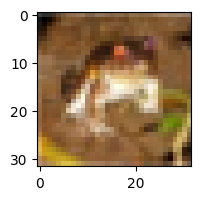

In [27]:
plot_sample(X_train,y_train,0)

TypeError: ignored

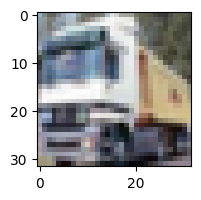

In [29]:
plot_sample(X_train,y_train,1)

TypeError: ignored

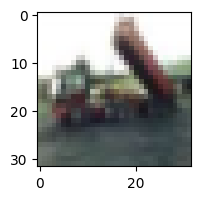

In [30]:
plot_sample(X_train,y_train,2)

TypeError: ignored

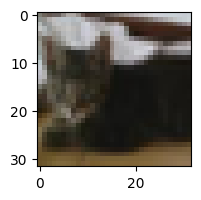

In [32]:
plot_sample(X_train,y_train,9)

In [33]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [34]:
#Normalizing the training data

In [35]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [36]:
#Build simple artificial neural network for image classification

In [41]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu')
    layers.Dense(1000,activation='relu')
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']')


            ann.fit(X_train,y_train,epochs=5)

SyntaxError: ignored

In [40]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8157 - accuracy: 0.3509
Epoch 2/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.6258 - accuracy: 0.4229
Epoch 3/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.5419 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.4835 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4351 - accuracy: 0.4949


In [42]:
#You can see that at the end of 5 epochs, accuracy is at around 49%



In [43]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 6s 20ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.44      0.50      1000
           1       0.76      0.34      0.47      1000
           2       0.28      0.52      0.36      1000
           3       0.37      0.27      0.31      1000
           4       0.47      0.32      0.38      1000
           5       0.41      0.33      0.37      1000
           6       0.44      0.66      0.53      1000
           7       0.68      0.37      0.48      1000
           8       0.45      0.78      0.57      1000
           9       0.54      0.53      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [44]:
#Now let us build a convolutional neural network to train our images

In [46]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [47]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 1.4281 - accuracy: 0.4843
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0772 - accuracy: 0.6237
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9492 - accuracy: 0.6714
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8621 - accuracy: 0.6998
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7953 - accuracy: 0.7241
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7354 - accuracy: 0.7436
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6809 - accuracy: 0.7633
Epoch 8/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6365 - accuracy: 0.7770
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.5949 - accuracy: 0.7910
Epoch 10/10
1563/1563 [==============================] - 48s 31m

In [49]:
#With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [50]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9644 - accuracy: 0.6955


[0.9643753170967102, 0.6955000162124634]

In [51]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[2.6182033e-05, 7.8280590e-04, 2.6739415e-04, 8.4413058e-01,
        2.9796949e-05, 1.5455034e-01, 1.7560403e-04, 2.0567777e-06,
        3.1668904e-05, 3.5375656e-06],
       [1.0466663e-02, 9.9404186e-02, 1.3657599e-06, 1.2792569e-06,
        2.4232901e-07, 5.3680500e-09, 7.7955054e-10, 4.3570996e-09,
        8.8979322e-01, 3.3291720e-04],
       [3.2470840e-01, 5.4126631e-02, 2.2004272e-03, 2.6667165e-03,
        2.0505798e-03, 3.0395403e-04, 1.0643270e-04, 2.1300136e-04,
        5.6714004e-01, 4.6483871e-02],
       [8.7902445e-01, 2.3080020e-03, 2.2143617e-02, 4.2466200e-03,
        9.9708308e-03, 1.9526089e-04, 3.4639268e-04, 6.5728673e-05,
        7.9621799e-02, 2.0771849e-03],
       [2.6647479e-08, 9.8232090e-07, 5.0467324e-02, 6.8558015e-02,
        4.4035429e-01, 7.4516190e-03, 4.3314767e-01, 1.2235521e-05,
        7.4923387e-06, 2.0131469e-07]], dtype=float32)

In [52]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [53]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

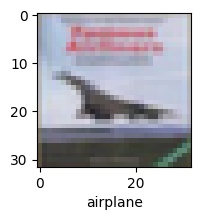

In [54]:
plot_sample(X_test, y_test,3)

In [55]:
classes[y_classes[3]]

'airplane'

In [60]:
classes[y_classes[3]]


'airplane'